# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [96]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [98]:
# from google.colab import drive
# drive.mount('/content/drive')

file_path = r"C:\Users\김현호\Desktop\Ybigta 교육세션 자료\2023-2 교육세션\0713 EDA-FE\airbnb_listings.csv"

In [99]:
df = pd.read_csv(file_path, index_col=0) 

C:\Users\김현호\AppData\Local\Temp\ipykernel_4848\329890030.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [100]:
# Q1
display(df.head())

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,...,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,...,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,...,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [101]:
# Q2
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 50796 entries, 0 to 50795
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_response_time                31790 non-null  object 
 2   host_response_rate                31790 non-null  object 
 3   host_acceptance_rate              36781 non-null  object 
 4   host_is_superhost                 50791 non-null  object 
 5   host_listings_count               50791 non-null  float64
 6   host_total_listings_count         50791 non-null  float64
 7   host_verifications                50791 non-null  object 
 8   host_has_profile_pic              50791 non-null  object 
 9   host_identity_verified            50791 non-null  object 
 10  neighborhood                      50796 non-null  object 
 11  latitude                          50796 non-null  float64
 12  longitude

In [102]:
#Q2
#결측치의 수
missing_columns = df.columns[df.isnull().any()]
missing_num = df[missing_columns].isnull().sum()

#결측치 비율
missing_percent = (df[missing_columns].isnull().sum() / len(df) *100).round(1)

#수, 비율 합치기
missing_df = pd.DataFrame({'Missing num': missing_num, 'Missing %': missing_percent})

#정렬
missing_df_sorted = missing_df.sort_values(by='Missing num', ascending=False)

# 결과 출력
missing_df_sorted

,Missing num,Missing %
jurisdiction_names,50781,100.0
license,50759,99.9
square_feet,50407,99.2
monthly_price,46119,90.8
weekly_price,45411,89.4
host_response_rate,19006,37.4
host_response_time,19006,37.4
security_deposit,17325,34.1
host_acceptance_rate,14015,27.6
review_scores_value,11482,22.6


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

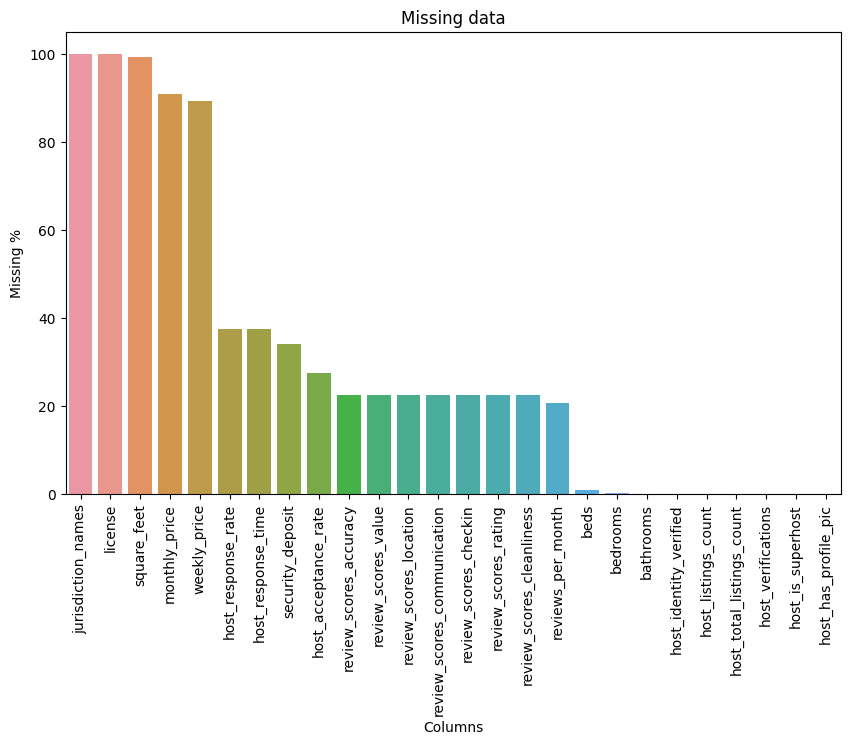

In [103]:
# Q3
missing_df_sorted = missing_df.sort_values(by='Missing %', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=missing_df_sorted.index, y='Missing %', data=missing_df_sorted, ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Missing %')
ax.set_title('Missing data')

plt.xticks(rotation=90)

plt.show()


- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [104]:
# Q4
display(df[df['beds'].isnull()].head())

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,...,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,...,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,...,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,...,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


In [105]:
df['beds'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
50791    False
50792    False
50793    False
50794     True
50795    False
Name: beds, Length: 50796, dtype: bool

---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [106]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [107]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50791 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room_type

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

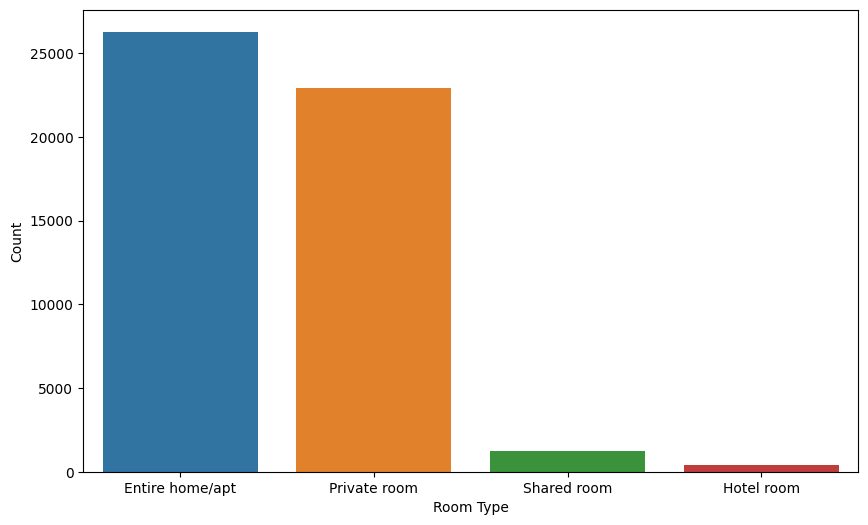

In [109]:
# Q5
#룸 타입 별 갯수
room_type_counts = df['room_type'].value_counts()

# 그래프로 만들기
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, ax=ax)

ax.set_xlabel('Room Type')
ax.set_ylabel('Count')

plt.show()

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

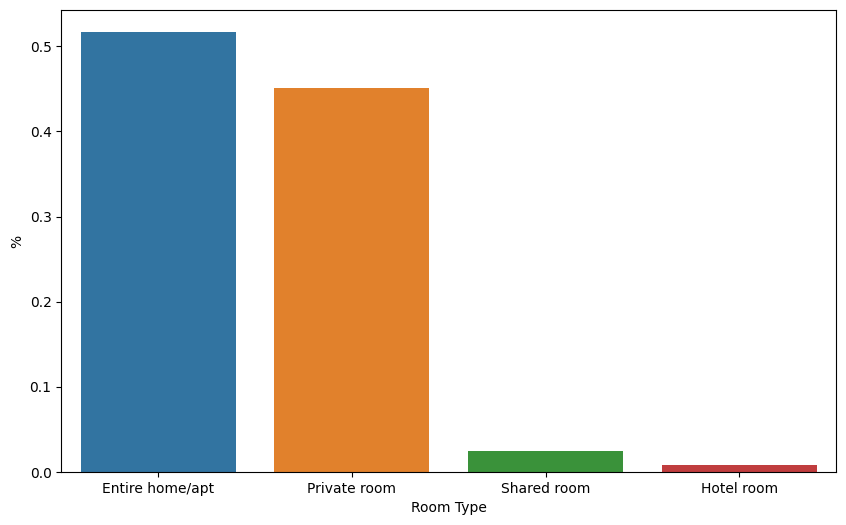

In [110]:
# Q6
room_type_counts = df['room_type'].value_counts()

room_type_percentages = room_type_counts / room_type_counts.sum()

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=room_type_counts.index, y=room_type_percentages.values, ax=ax)

ax.set_xlabel('Room Type')
ax.set_ylabel('%')

plt.show()

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

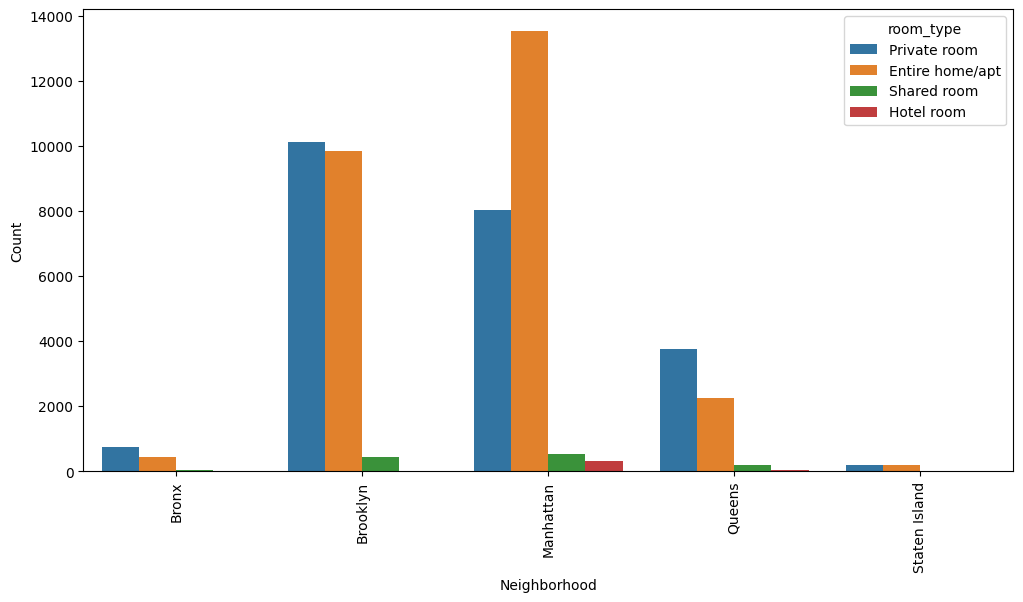

In [111]:
# Q7
room_type_counts_by_neighborhood = df.groupby('neighborhood')['room_type'].value_counts().reset_index(name='count')

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=room_type_counts_by_neighborhood, x='neighborhood', y='count', hue='room_type', ax=ax)

ax.set_xlabel('Neighborhood')
ax.set_ylabel('Count')

plt.xticks(rotation=90)

plt.show()

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

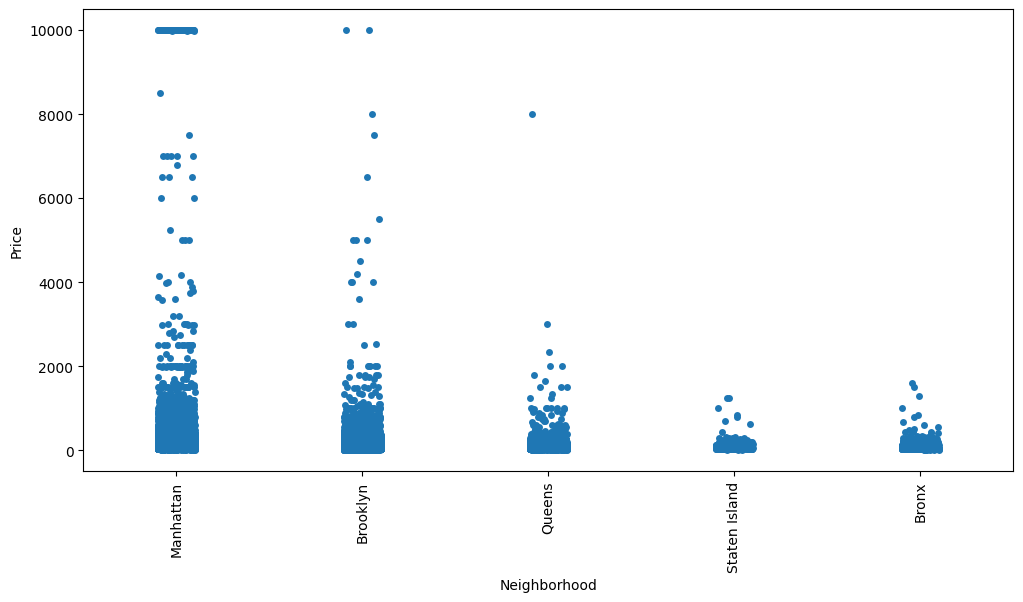

In [112]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요
fig, ax = plt.subplots(figsize=(12, 6))
sns.stripplot(data=df, x='neighborhood', y='price', ax=ax)

ax.set_xlabel('Neighborhood')
ax.set_ylabel('Price')

plt.xticks(rotation=90)

plt.show()


- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

맨하탄과 브로클린에 비싼 객실이 상대적으로 많다는 것을 알 수 있고, 이는 곧 비싼 객실을 소비하는 소비자가 다른 동네보다 많다고 볼 수 있습니다.

# Q9

Manhattan과 같은 인기 있는 여행지는 가격이 비싼 Entire home/apt나 Hotel room의 수요가 크므로, 방 가격을 비싸게 책정하는 것이 좋을 것입니다. 왜냐하면, 지역별 room type 그래프에서 볼 수 있듯이 Manhattan은 Entire home/apt가 가장 많고, 지역별 가격 그래프에서 볼 수 있듯이 Manhattan이 비교적 비싼 가격에 분포해있기 때문입니다.

반면에 Brnox의 경우, 가격이 싼 Private room의 수요가 크므로 방 가격을 싸게 책정하는 것이 좋을 것입니다. 왜냐하면, 지역별 room type 그래프에서 볼 수 있듯이 Brnox는 Private room이 가장 많고, 지역별 가격 그래프에서 볼 수 있듯이 Brnox가 비교적 싼 가격에 분포해있기 때문입니다.

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

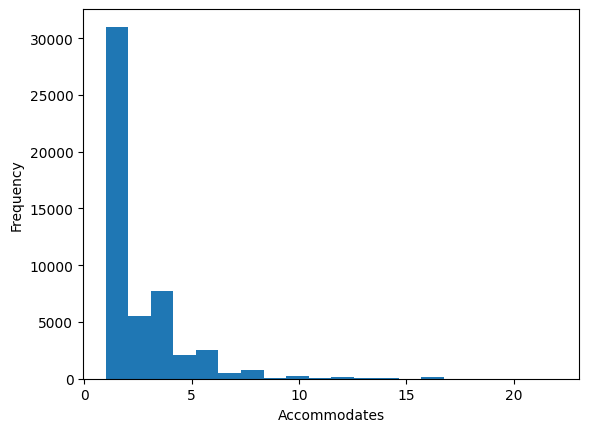

In [113]:
# Q10
plt.hist(df['accommodates'], bins=20)

plt.xlabel('Accommodates')
plt.ylabel('Frequency')

plt.show()

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

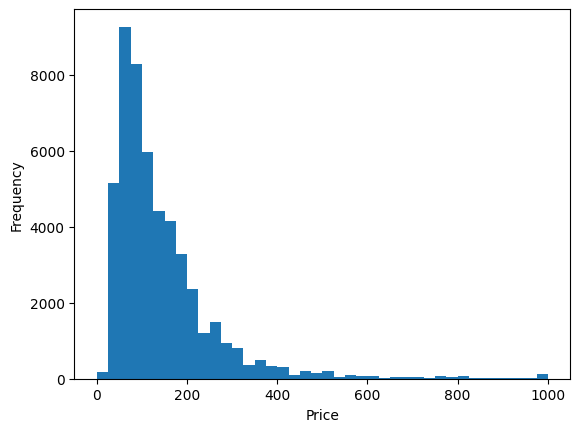

In [114]:
# Q11
plt.hist(df['price'], bins=40, range=(0, 1000))

plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [115]:
df = pd.read_csv(file_path, index_col=0) 

C:\Users\김현호\AppData\Local\Temp\ipykernel_4848\329890030.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, index_col=0)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [116]:
#Q12
missing_percent = df.isnull().sum() / len(df)

# 결측치 처리
for column in df.columns:
    if missing_percent[column] >= 0.25:
        # 결측치가 25% 이상 column을 drop
        df = df.drop(column, axis=1)
    elif missing_percent[column] >= 0.1:
        # 결측치가 10% 이상 25% 미만 row만 drop
        df = df.dropna(subset=[column])
    else:
        # 결측치가 10% 미만 숫자형은 중앙값, 문자형은 최빈값으로 대체
        if df[column].dtype != object:
            median = df[column].median()
            df[column] = df[column].fillna(median)
        else:
            mode = df[column].mode().iloc[0]
            df[column] = df[column].fillna(mode)


- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [117]:
display(df.head())

,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
1,2595,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,...,10.0,10.0,9.0,f,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,...,10.0,10.0,8.0,f,f,f,moderate,f,f,4.71
3,5099,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,...,10.0,10.0,9.0,f,f,f,moderate,t,t,0.59
4,5114,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,...,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,0.56
5,5121,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,Brooklyn,40.68688,-73.95596,...,10.0,9.0,9.0,f,f,f,strict_14_with_grace_period,f,f,0.38


In [118]:
#Q13-1)
# 1. 'price_per_person' 피처 생성
df['price_per_person'] = df['price'] / df['accommodates']

# 각 숙소의 인당 가격

In [119]:
#Q13-2)
# 2. 'availability_ratio' 피처 생성
df['availability_ratio'] = df['availability_365'] / 365

# 1년 중 숙소가 이용 가능한 비율

In [120]:
#Q13-3)
# 3. 'weighted_review_score' 피처 생성
df['weighted_review_score'] = (df['review_scores_rating'] * df['number_of_reviews']) / (df['number_of_reviews'].sum())

# 리뷰 점수와 리뷰 수를 고려하여 가중 평균한 값이다.

---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---